In [16]:
# Import all the necessary libraries.
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import functools
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.core.display import display, HTML



np.random.seed(32)

"""
Generate data points for plotting the error surface.
"""
def calculateErrorSurface(y, x1, x2):
    # Generate values for parameter space.
    N = 200
    a1 = np.linspace(-10.0, 14.0, N)
    a2 = np.linspace(-10.0, 14.0, N)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((N,N))
    for iter1 in range(0, N):
        for iter2 in range(0, N):
            yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
            J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat)  )
            
    return J, A1, A2
            
"""
Calculate closed-form solution using the normal equation.
"""
def calculateClosedFormSolution(X, x1, x2):
    # Closed-form solution.
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    yhat = a_opt[0, 0]*x1 + a_opt[1, 0]*x2
    Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )
    
    return Joptimum, a_opt

"""
Batch gradient descent solution.
"""
def batchGradientDescent(alpha, n_iterations, X_b, y):
    # Random initialization of parameters.
    a = np.zeros((2,1))
    a[0] = -10;
    a[1] = -10;

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_iterations+1))
    
    # Initialize history vector.
    a_hist[0, 0] = a[0]
    a_hist[1, 0] = a[1]

    # Batch gradient-descent loop.
    for iteration in range(n_iterations):
        gradients = -2/M * X_b.T.dot(y - X_b.dot(a))
        a = a - alpha * gradients
        a_hist[0, iteration+1] = a[0]
        a_hist[1, iteration+1] = a[1]
        Jgd[iteration+1] = (1/M)*sum(np.power( (y - X.dot(a)) , 2))
        
    return a, a_hist, Jgd

"""
Hypothesis Function
"""
def h(X_b, a):
    return a.T.dot(X_b.T)
    
## --------------------------------------------------------   
    
# Number of examples.
M = 1000

# Generate target function.
x1 = np.random.normal(0, 1, (M, 1))
x2 = np.random.normal(0, 1, (M, 1))
w = np.random.normal(0, 1, (M, 1))

y = 2*x1 + 2*x2 + w

X = np.c_[x1, x2]
X_b = X

n_iterations = 1000
a = np.zeros((2, 1))

Jgd = np.zeros(n_iterations+1)

Jgd[0] = (1/M)*sum(np.power(y - X.dot(a), 2))

# Batch gradient descent solution.
alpha = 0.44  # learning rate


# Calculate data point for plotting error surface.
J, A1, A2 = calculateErrorSurface(y, x1, x2)

# Calculate closed-form solution.
Joptimum, a_opt = calculateClosedFormSolution(X_b, x1, x2)

# Run batch gradient-descent algorithm.
a, a_hist, Jgd = batchGradientDescent(alpha, n_iterations, X_b, y)

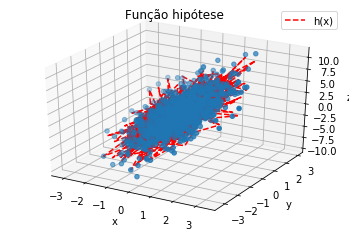

In [17]:
fig = plt.figure()

ax = plt.subplot(projection='3d')

x1Aux = np.concatenate( x1, axis=0 )
x2Aux = np.concatenate( x2, axis=0 )
yAux = np.concatenate( y, axis=0 )

ax.scatter(x1Aux, x2Aux, yAux)
xl = []
yl = []
ln, = plt.plot(xl, yl, 'r--', animated=True, label='h(x)')
plt.title('Função hipótese')

def init():
    plt.legend(handles=[ln])
    ax.set_xlabel('x')  # Adiciona uma label ao eixo x.
    ax.set_ylabel('y')  # Adiciona uma label ao eixo y.
    ax.set_zlabel('z')  # Adiciona uma label ao eixo z.
    return ln,

def update(frame):
    theta = np.zeros((2,1))
    theta[0] = a_hist[0,frame]
    theta[1] = a_hist[1,frame]
    f = functools.partial(h, a=theta)
    yAux2 = f(X_b)
    ln.set_data_3d(x1Aux, x2Aux, yAux2)
    return ln,

# Create animated figure.
ani = FuncAnimation(fig, update, frames=200, init_func=init, blit=False, interval=300)
# Display the animated figure.
display(HTML(ani.to_html5_video()))

# Save the animated figure.
#ani.save('animated_linear_regression.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

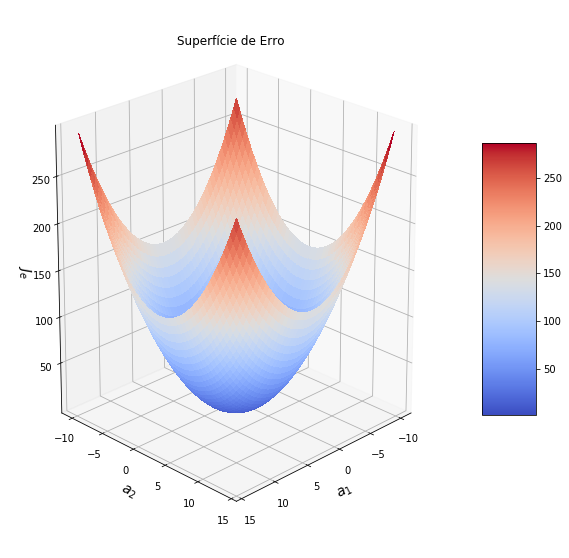

In [18]:
# Plot cost-function surface.
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Superfície de Erro')
ax.view_init(20, 45)
#Show the plot.
plt.show()

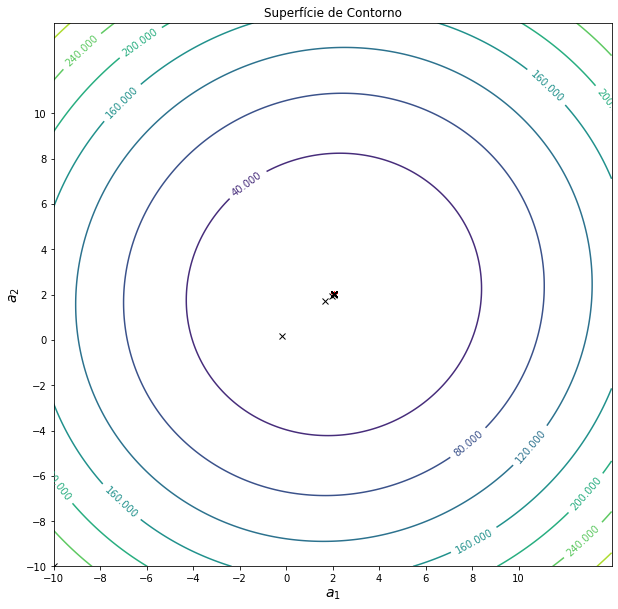

In [19]:
# Plot figure.        
fig = plt.figure(figsize=(10,10))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Superfície de Contorno')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, :], a_hist[1, :], 'kx')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.show()

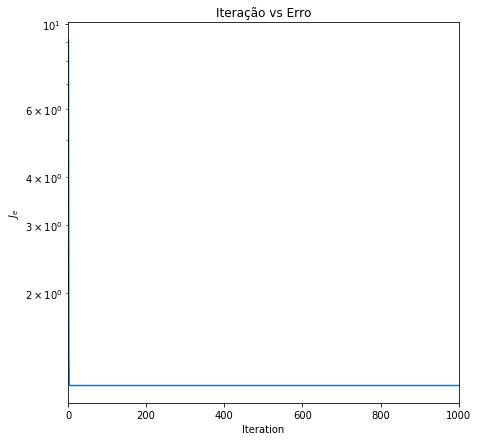

In [20]:
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, n_iterations), Jgd[0:n_iterations])
plt.xlim((0, n_iterations))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Iteração vs Erro')
plt.show()

**e. Comparem os resultados do mini-batch com os resultados obtidos com o GD em batelada (batch) e GD estocástico (Dica: para a comparação, usem os códigos que estão nos slides da aula e plotem os gráficos da superfície de contorno com os parâmetros a1 e a2 para cada iteração e o gráfico de iteração versus o erro para GD em batelada e estocástico). Baseando-se nos gráficos do item anterior, a que conclusões vocês podem chegar quanto ao treinamento dos 3 tipos de gradiente descendente?**
 
R: baseando-se nos gráficos anteriores podemos concluir que o minibatch e sobretudo o estocástico oscilam a volta do mínimo global, enquanto que o Batch caminha em linha recta. Além disso, vemos que com o passo óptimo o Minibatch chega ao mesmo resultado que o Batch com muito menos épocas. Ao mesmo tempo o estocástico pode chegar a um resultado bom (muito próximo do óptimo) se for usado um passo óptimo.
Para diminuir a oscilação em torno do mínimo global, e obter uma convergência mais rápida (no caso do minibatch e estocástico) podemos variar o passo de aprendizagem ao longo do treinamento e ainda evitar mínimos globais (também para o caso do estocástico e minibatch).